In [1]:
#数据预处理
#数据质量：缺失值处理、异常处理、重复数据
#数据结构：格式转化、数据合并
#1. 删除重复数据，并输出去重前后的数据量
import pandas as pd

# 读取原始数据
raw_data = pd.read_csv('github_bot_raw_data.csv')

# 提取需要的列
columns = [
    'actor_id', 'label', 'login', 'id', 'node_id', 'avatar_url', 'gravatar_id', 'url',
    'html_url', 'followers_url', 'following_url', 'gists_url', 'starred_url',
    'subscriptions_url', 'organizations_url', 'repos_url', 'events_url',
    'received_events_url', 'type', 'site_admin', 'name', 'company', 'blog',
    'location', 'email', 'hireable', 'bio', 'twitter_username', 'public_repos',
    'public_gists', 'followers', 'following', 'created_at', 'updated_at'
]
data = raw_data[columns]

# 输出去重前数据量
print(f"Data size before deduplication: {data.shape[0]} rows")

# 检查重复数据数量
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# 删除重复数据
data_cleaned = data.drop_duplicates()

# 输出去重后数据量
print(f"Data size after deduplication: {data_cleaned.shape[0]} rows")

# 如果需要保存去重后的数据到文件
data_cleaned.to_csv('github_bot_cleaned_data.csv', index=False)



Data size before deduplication: 20358 rows
Number of duplicate rows: 579
Data size after deduplication: 19779 rows


In [2]:
#2. 缺失值处理
#首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
#其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
#最后，再次看各列有无缺失值
import pandas as pd

# 读取原始数据
raw_data = pd.read_csv('github_bot_raw_data.csv')

# 删除 gravatar_id 列
data = raw_data.drop(columns=['gravatar_id'])

# 查看各列的缺失值情况
missing_before = data.isnull().sum()
print("Missing values before processing:")
print(missing_before[missing_before > 0])

# 转换为布尔变量的列
# 判断某些列是否存在值（如公司、位置、博客等），将其转换为布尔类型
boolean_columns = ['company', 'location', 'blog', 'email', 'hireable']
for col in boolean_columns:
    data[col] = data[col].notnull()

# 填充文本字段的缺失值
# 填充空字符串
text_columns = ['bio', 'twitter_username', 'name']
for col in text_columns:
    data[col] = data[col].fillna('')

# 再次检查缺失值
missing_after = data.isnull().sum()
print("\nMissing values after processing:")
print(missing_after[missing_after > 0])

# 保存清洗后的数据
data.to_csv('github_bot_missing_handled.csv', index=False)


Missing values before processing:
name                 2654
company              9229
blog                11601
location             7287
email               12079
hireable            16956
bio                 11262
twitter_username    15297
dtype: int64

Missing values after processing:
Series([], dtype: int64)


In [3]:
#3. 数据变换，将created_at、updated_at转为时间戳
import pandas as pd

# 读取数据
data = pd.read_csv('github_bot_missing_handled.csv')

# 转换 created_at 和 updated_at 列为时间戳
data['created_at'] = pd.to_datetime(data['created_at']).astype('int64') // 10**9
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') // 10**9

# 查看转换后的数据
print(data[['created_at', 'updated_at']].head())

# 保存转换后的数据
data.to_csv('github_bot_timestamp_data.csv', index=False)


   created_at  updated_at
0  1317058023  1697196070
1  1435572766  1696659974
2  1220026803  1696212681
3  1400611389  1697115299
4  1345126753  1696593521


Label distribution:
label
Human    19140
Bot       1218
Name: count, dtype: int64


C:\Users\李晨语\AppData\Local\Temp\ipykernel_3448\2741981642.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")


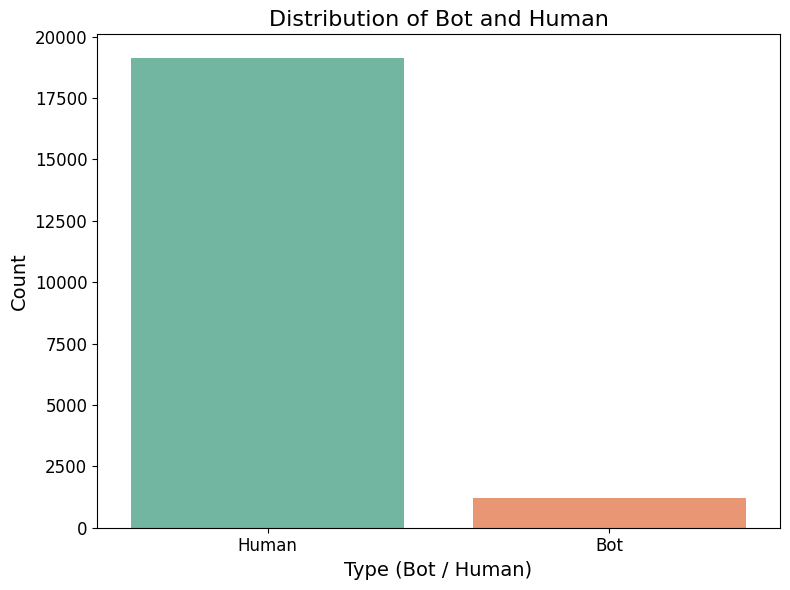

In [21]:
#4. 数据可视化
#4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('github_bot_timestamp_data.csv')

# 检查 label 列的分布
label_counts = data['label'].value_counts()
print("Label distribution:")
print(label_counts)

# 绘制柱状图
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.title('Distribution of Bot and Human', fontsize=16)
plt.xlabel('Type (Bot / Human)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('bot_vs_human_barplot.png')
plt.show()


Bot account creation year distribution:
created_year
2008     17
2009     41
2010     57
2011    102
2012     68
2013     85
2014     88
2015     92
2016    102
2017    144
2018    151
2019    128
2020     96
2021     47
Name: count, dtype: int64


C:\Users\李晨语\AppData\Local\Temp\ipykernel_3448\1721153607.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['created_year'] = pd.to_datetime(bot_data['created_at'], unit='s').dt.year
C:\Users\李晨语\AppData\Local\Temp\ipykernel_3448\1721153607.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="Blues_d")


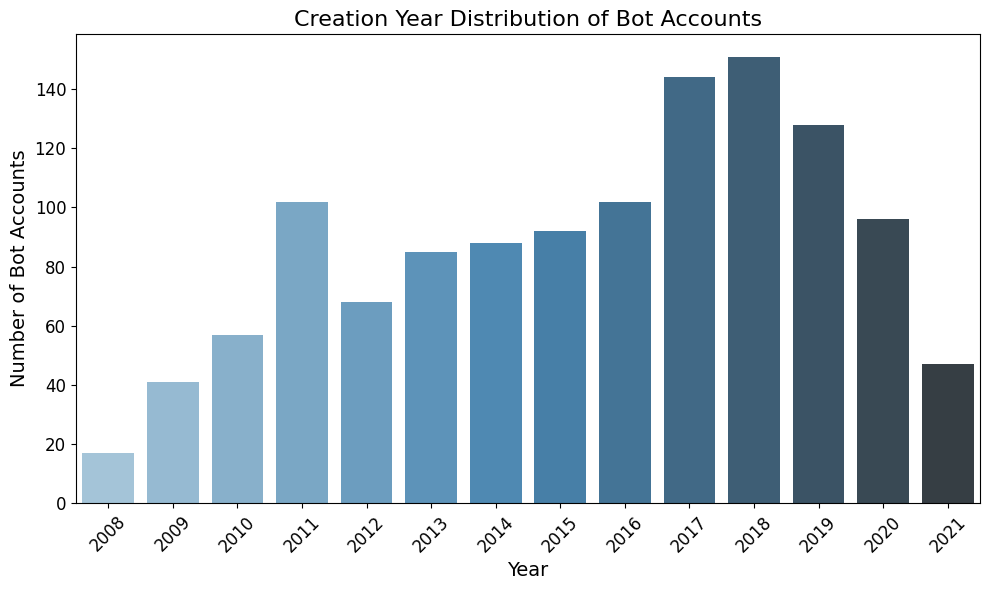

In [20]:
#4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('github_bot_timestamp_data.csv')

# 筛选 Bot 类型账号
bot_data = data[data['label'] == 'Bot']

# 提取创建年份
bot_data['created_year'] = pd.to_datetime(bot_data['created_at'], unit='s').dt.year

# 检查年份分布
yearly_counts = bot_data['created_year'].value_counts().sort_index()
print("Bot account creation year distribution:")
print(yearly_counts)

# 绘制柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette="Blues_d")
plt.title('Creation Year Distribution of Bot Accounts', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Bot Accounts', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('bot_creation_barplot.png')
plt.show()


Human account creation year distribution:
created_year
2008     464
2009     871
2010    1281
2011    1642
2012    2280
2013    2242
2014    2004
2015    1683
2016    1456
2017    1290
2018    1102
2019    1138
2020    1146
2021     541
Name: count, dtype: int64


C:\Users\李晨语\AppData\Local\Temp\ipykernel_3448\2628523048.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_data['created_year'] = pd.to_datetime(human_data['created_at'], unit='s').dt.year


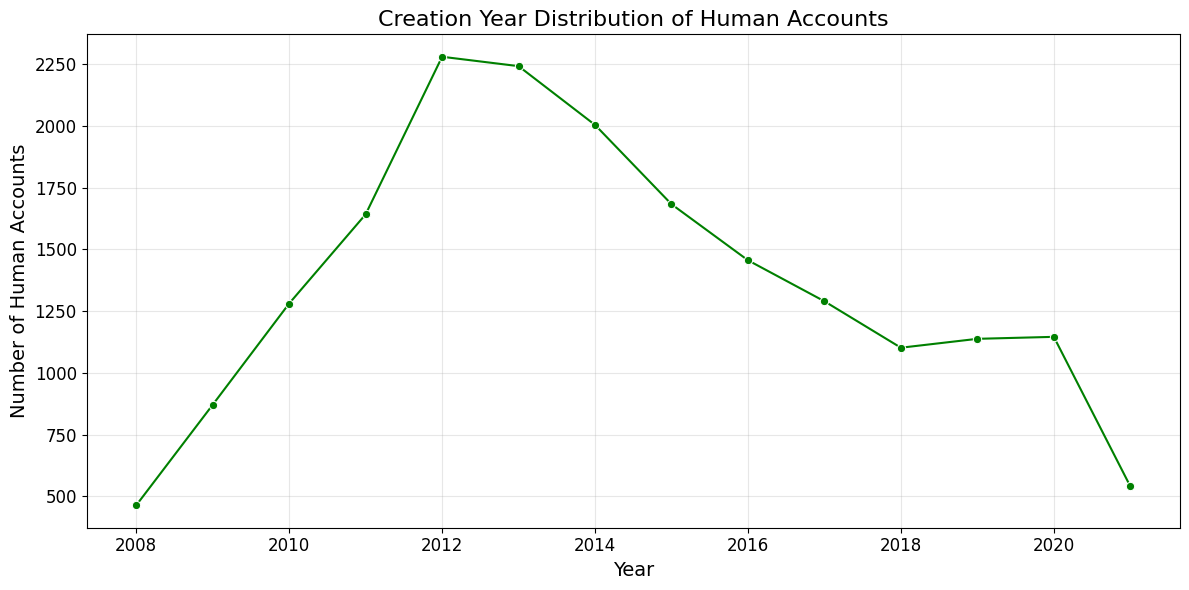

In [19]:
#4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('github_bot_timestamp_data.csv')

# 筛选 Human 类型账号
human_data = data[data['label'] == 'Human']

# 提取创建年份
human_data['created_year'] = pd.to_datetime(human_data['created_at'], unit='s').dt.year

# 检查年份分布
yearly_counts_human = human_data['created_year'].value_counts().sort_index()
print("Human account creation year distribution:")
print(yearly_counts_human)

# 绘制折线图
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts_human.index, y=yearly_counts_human.values, marker='o', color='green')
plt.title('Creation Year Distribution of Human Accounts', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Human Accounts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('human_creation_lineplot.png')
plt.show()


Summary statistics for Bot accounts:
          followers    following
count   1218.000000  1218.000000
mean      95.636289    16.185550
std      688.556881   103.313454
min        0.000000     0.000000
25%        1.000000     0.000000
50%        7.000000     0.000000
75%       41.750000     3.000000
max    18292.000000  2310.000000


C:\Users\李晨语\AppData\Local\Temp\ipykernel_3448\2666704661.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['followers_group'] = pd.cut(bot_data['followers'], bins=bins, labels=labels, right=False)
C:\Users\李晨语\AppData\Local\Temp\ipykernel_3448\2666704661.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['following_group'] = pd.cut(bot_data['following'], bins=bins, labels=labels, right=False)


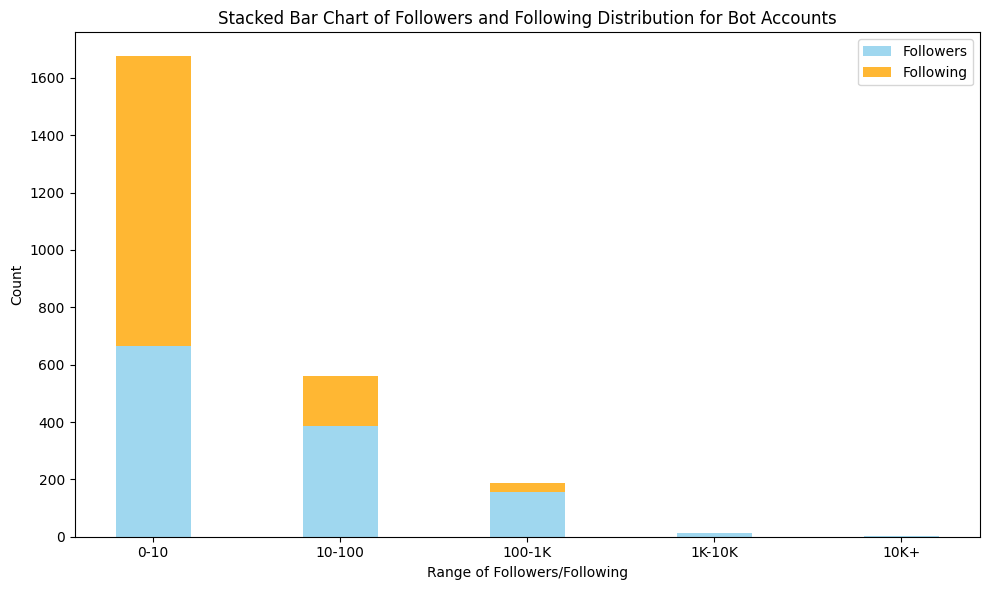

In [23]:
#4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_csv('github_bot_timestamp_data.csv')

# 筛选 Bot 类型账号
bot_data = data[data['label'] == 'Bot']

# 查看 followers 和 following 数据分布
print("Summary statistics for Bot accounts:")
print(bot_data[['followers', 'following']].describe())

# 分组统计数据
bins = [0, 10, 100, 1000, 10000, 100000]
labels = ['0-10', '10-100', '100-1K', '1K-10K', '10K+']
bot_data['followers_group'] = pd.cut(bot_data['followers'], bins=bins, labels=labels, right=False)
bot_data['following_group'] = pd.cut(bot_data['following'], bins=bins, labels=labels, right=False)

followers_dist = bot_data['followers_group'].value_counts().sort_index()
following_dist = bot_data['following_group'].value_counts().sort_index()

# 创建堆叠柱状图
plt.figure(figsize=(10, 6))
x = range(len(labels))
plt.bar(x, followers_dist, width=0.4, label='Followers', alpha=0.8, color='skyblue')
plt.bar(x, following_dist, width=0.4, label='Following', alpha=0.8, color='orange', bottom=followers_dist)
plt.xticks(x, labels)
plt.xlabel('Range of Followers/Following')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Followers and Following Distribution for Bot Accounts')
plt.legend()
plt.tight_layout()
plt.savefig('stacked_bar_chart_followers_following.png')
plt.show()




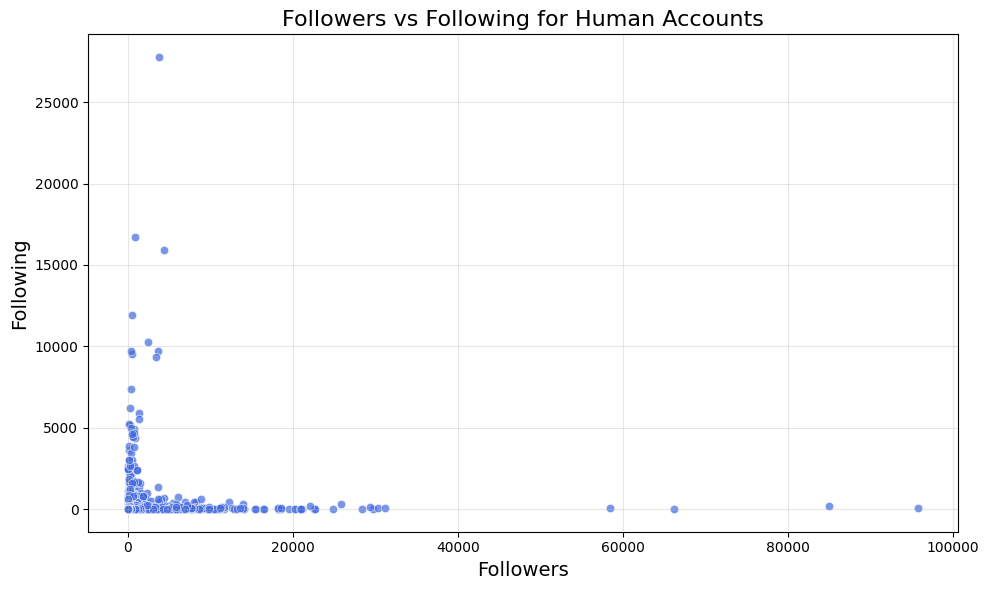

In [24]:
#4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
import matplotlib.pyplot as plt
import seaborn as sns

# 提取human类型数据
human_data = data[data['label'] == 'Human']

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(data=human_data, x='followers', y='following', alpha=0.7, color='royalblue')
plt.title('Followers vs Following for Human Accounts', fontsize=16)
plt.xlabel('Followers', fontsize=14)
plt.ylabel('Following', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


报告：
（4.1）
（选择可视化方式的原因）选择柱状图适合展示不同类别的绝对数量对比，易于快速了解 Bot 和 Human 数据的实际数量差距。
（结果分析）Bot 类型的数量显著少于 Human，从绝对值来看，Human 占主导地位，可能因为 GitHub 用户多为真实用户。
（数据洞察）Bot 用户的特性:通常是自动化脚本或应用程序用户，可能集中于特定用途（如代码扫描、CI/CD）。可以进一步分析 Bot 用户的行为特征，例如创建时间、活动频率。Human 用户的主导地位:大部分 GitHub 用户是实际开发者。Human 类型的数据量较大，为模型训练和用户画像分析提供了更多参考。潜在分析方向:研究不同类型用户的时间分布（created_at）。分析 Human 和 Bot 在公共仓库（public_repos）或粉丝数量（followers）上的行为差异。
（4.2）
（选择可视化方式的原因）柱状图:强调不同年份间的数量差异,更适合绝对数量的对比。
（结果分析）（趋势观察）早期阶段: Bot 账号在 GitHub 早期（2010 年前）创建数量较少。增长期: 2015 年后，Bot 账号的创建数量显著增加，可能与 GitHub 的自动化工具和 CI/CD 的普及有关。高峰期: 某些年份（如 2020 年）创建数量达到高峰，可能与全球开发者行为变化（如疫情期间远程工作和工具自动化的需求增加）相关。（数量对比）柱状图显示了各年份 Bot 账号数量的显著差异。最近几年（如 2022 年及以后）的创建数量可能稍有下降，但仍保持较高水平。
（数据洞察）Bot 账号数量的增长可能与 GitHub 功能更新及开发者生态变化相关，例如引入 Actions（GitHub CI/CD 工具）和大量自动化工具。某些年份的激增（如 2020 年）表明开发者对自动化操作的需求显著增加。这种趋势可能与技术发展和开发环境变化有关。按功能分析 Bot 账号的分布（例如仓库数量或活动频率）。对比不同时间创建的 Bot 的特性（如使用目的或领域
（4.3）
（选择可视化方式的原因）折线图适合展示 Human 账号数量的时间序列趋势，便于直观观察年份变化中的增长规律和异常年份。
（结果分析）早期阶段: Human 账号在 GitHub 创建初期（2008 年及之前）较少。显著增长期: 从 2012 年开始，Human 账号数量快速增长，尤其在 2014-2020 年间出现大幅增加。高峰期: 2020 年为创建数量的显著高峰，这可能与全球疫情推动的远程工作需求增加密切相关。
从核密度图可见，Human 账号创建的高密度区域集中在 2015-2020 年间，显示出 GitHub 用户生态快速扩展的阶段。
（数据洞察）GitHub 用户的快速增长与平台功能扩展（如引入 GitHub Actions 和更完善的协作工具）高度相关。早期用户多为开发者核心群体，近几年更多普通用户和新开发者加入。2020 年高峰可能受全球远程工作普及的推动，同时伴随软件开发行业对版本控制和协作工具需求的上升。分布逐渐扩展到全球不同地区的用户，可能推动非传统软件行业对 GitHub 的需求增长。对比 Bot 用户，Human 用户增长表现出更长久的稳步趋势。
（4.4）
（选择可视化方式的原因）多图组合（柱状图、散点图、小提琴图、联合分布图）提供了多维度的洞察。对数缩放解决了数据范围跨度过大的问题，使得极值影响被弱化。
（结果分析）堆叠柱状图：更直观地展示不同范围内的 followers 和 following 分布比例。
（数据洞察）followers 和 following 的分布不均：大部分 Bot 账号的 followers 和 following 数量很低（集中在 0-10 或 10-100 范围）。长尾分布明显，少数账号拥有极高的 followers 或 following。followers 和 following 的关系：following 明显更容易出现高值，表明部分 Bot 账号更倾向于主动关注其他用户。极端值可能是异常活跃或用于网络爬取任务的 Bot。
（4.5）
（选择可视化方式的原因）散点图能够非常直观地展示两个变量之间的关系，散点图适用于观察数据点是否有趋势、聚集或离群现象，散点图能够处理大规模数据集并提供足够的可读性，尤其是当我们不确定数据分布的形态时，它可以帮助我们快速判断。
（结果分析）在 followers 和 following 数值较低的区域，有大量数据点聚集。大多数 human 类型账号的 followers 和 following 数量都比较低，这符合大多数用户处于社交网络的边缘，拥有的 followers 和 following 数量相对较少。在散点图的右上角有几个孤立的数据点，表示一些用户拥有极高的 followers 或 following 数量。从散点图来看，似乎没有明确的线性趋势。
(数据洞察)绝大多数 human 账号的 followers 数量较低，而 following 数量也相对较低，表明大部分用户处于社交网络的“边缘”，并没有强大的社交影响力。大部分用户在 followers 和 following 之间的关系较为分散，说明社交网络的用户并非都在同时扩展自己的社交圈。有些用户可能专注于增加关注者，而有些则在增加关注的同时保持较低的粉丝数量。
